**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2023*

----

# Trabajo práctico entregable - parte 1

# Librerías

In [131]:
%pip install matplotlib -q
%pip install pandas -q
%pip install seaborn -q
%pip install sqlalchemy -q
%pip install plotly -q
%pip install missingno -q
%pip install scikit-learn -q

7195.66s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


7202.27s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


7208.68s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


7215.08s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


7221.42s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


7227.69s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


7234.02s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [132]:
###### librerias #####
import matplotlib.pyplot as plt
import numpy
import pandas as pd

import plotly
import plotly.express as px
import seaborn
seaborn.set_context('talk')

from sklearn.impute import SimpleImputer

import missingno as msno

from sqlalchemy import create_engine, text

# Carga de datos

In [133]:
melb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [134]:
#Ver columnas
melb_df.columns 


Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

# Ejercicio 1 SQL

## 1. Crear una base de datos en SQLite utilizando la libreria [SQLalchemy](https://stackoverflow.com/questions/2268050/execute-sql-from-file-in-sqlalchemy).
https://docs.sqlalchemy.org/en/14/core/engines.html#sqlite

In [135]:
engine = create_engine('sqlite:///airbnb.sqlite3', echo=True)

## 2. Ingestar los datos provistos en 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv' en una tabla y el dataset generado en clase con datos de airbnb y sus precios por codigo postal en otra.

### melb_df

In [136]:
#Ingesto los datos en una tabla
melb_df.to_sql('melb_data', con=engine, if_exists="replace")

2023-06-08 00:18:24,201 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-06-08 00:18:24,220 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("melb_data")
2023-06-08 00:18:24,221 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-06-08 00:18:24,224 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("melb_data")
2023-06-08 00:18:24,225 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-06-08 00:18:24,226 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name
2023-06-08 00:18:24,226 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-06-08 00:18:24,228 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_temp_master WHERE type='table' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name
2023-06-08 00:18:24,229 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-06-08 00:18:24,230 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("melb_data")
2023-06-08 00:18:24,230 INFO sqlalchemy.engine.Engine [raw sql] ()


13580

### airbnb_df

In [137]:
#Cargo la base de Airbnb
url = "https://raw.githubusercontent.com/bonafepedro/exploratory_analisis_datacuration/master/data/airbnb_price_by_zipcode.csv"
airbnb_df = pd.read_csv(url)


In [138]:
#Veo las columnas
airbnb_df.columns

Index(['zipcode', 'airbnb_price_mean', 'airbnb_record_count',
       'airbnb_weekly_price_mean', 'airbnb_monthly_price_mean'],
      dtype='object')

In [139]:
#Ingesto los datos en una tabla
airbnb_df.to_sql('airbnb_data', con=engine, if_exists="replace")


2023-06-08 00:18:25,231 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-06-08 00:18:25,235 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("airbnb_data")
2023-06-08 00:18:25,236 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-06-08 00:18:25,237 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("airbnb_data")
2023-06-08 00:18:25,238 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-06-08 00:18:25,240 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name
2023-06-08 00:18:25,241 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-06-08 00:18:25,243 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_temp_master WHERE type='table' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name
2023-06-08 00:18:25,246 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-06-08 00:18:25,248 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("airbnb_data")
2023-06-08 00:18:25,249 INFO sqlalchemy.engine.Engine [raw sq

247

## 3. Implementar consultas en SQL que respondan con la siguiente información:

    - cantidad de registros totales por ciudad.
    - cantidad de registros totales por barrio y ciudad.

In [140]:
#Base de Melbourne
#Cantidad de registros totales por ciudad (Regionname) y Cantidad de registros totales por barrio (Suburb) y ciudad (Regionname). 
#Se toma Regionname como ciudad ya que es la columna con información más general de la localización de las propiedades

# Consulta 1: Cantidad de registros totales por ciudad
query1 = "SELECT Regionname, COUNT(*) as total_records\
            FROM melb_data\
            GROUP BY Regionname\
            ORDER BY total_records DESC"

# Consulta 2: Cantidad de registros totales por ciudad y barrio
query2 = "SELECT Regionname, Suburb, COUNT(*) as total_records\
            FROM melb_data\
            GROUP BY Regionname, Suburb\
            ORDER BY total_records DESC"

In [141]:
#Query 1. Convertimos a dataframe para una lectura mas facil
with engine.connect() as con:
      rs = con.execute(text(query1))
      df_all = pd.DataFrame(rs.fetchall())
      for row in rs:
          print(row)
df_all

2023-06-08 00:18:25,370 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-06-08 00:18:25,373 INFO sqlalchemy.engine.Engine SELECT Regionname, COUNT(*) as total_records            FROM melb_data            GROUP BY Regionname            ORDER BY total_records DESC
2023-06-08 00:18:25,373 INFO sqlalchemy.engine.Engine [generated in 0.00314s] ()
2023-06-08 00:18:25,383 INFO sqlalchemy.engine.Engine ROLLBACK


,Regionname,total_records
0,Southern Metropolitan,4695
1,Northern Metropolitan,3890
2,Western Metropolitan,2948
3,Eastern Metropolitan,1471
4,South-Eastern Metropolitan,450
5,Eastern Victoria,53
6,Northern Victoria,41
7,Western Victoria,32


In [142]:
#Query 2. Convertimos a dataframe para una lectura mas facil
with engine.connect() as con:
      rs = con.execute(text(query2))
      df_sub = pd.DataFrame(rs.fetchall())
      for row in rs:
          print(row)
df_sub

2023-06-08 00:18:25,426 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-06-08 00:18:25,427 INFO sqlalchemy.engine.Engine SELECT Regionname, Suburb, COUNT(*) as total_records            FROM melb_data            GROUP BY Regionname, Suburb            ORDER BY total_records DESC
2023-06-08 00:18:25,427 INFO sqlalchemy.engine.Engine [generated in 0.00125s] ()
2023-06-08 00:18:25,439 INFO sqlalchemy.engine.Engine ROLLBACK


,Regionname,Suburb,total_records
0,Northern Metropolitan,Reservoir,359
1,Northern Metropolitan,Richmond,260
2,Southern Metropolitan,Bentleigh East,249
3,Northern Metropolitan,Preston,239
4,Northern Metropolitan,Brunswick,222
...,...,...,...
309,South-Eastern Metropolitan,Sandhurst,1
310,Western Metropolitan,Plumpton,1
311,Western Metropolitan,Rockbank,1
312,Western Victoria,Bacchus Marsh,1


## 4. Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL  para obtener un resultado similar a lo realizado con Pandas en clase.  

In [143]:
#Query para combinar los datasets de ambas tablas utilizando JOIN
query3 = """
SELECT *
FROM melb_data
LEFT JOIN airbnb_data ON melb_data.Postcode = airbnb_data.zipcode
"""

In [144]:
#Query 3 . Convertimos a dataframe para una lectura mas facil
with engine.connect() as con:
      rs = con.execute(text(query3))
      df_join = pd.DataFrame(rs.fetchall())
      
      for row in rs:
          print(row)
df_join.drop(columns = ["index"], inplace = True)
df_join

2023-06-08 00:18:25,518 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-06-08 00:18:25,519 INFO sqlalchemy.engine.Engine 
SELECT *
FROM melb_data
LEFT JOIN airbnb_data ON melb_data.Postcode = airbnb_data.zipcode

2023-06-08 00:18:25,519 INFO sqlalchemy.engine.Engine [generated in 0.00147s] ()
2023-06-08 00:18:25,615 INFO sqlalchemy.engine.Engine ROLLBACK


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0,3067.0,130.624031,258.0,605.152174,2187.032258
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0,3067.0,130.624031,258.0,605.152174,2187.032258
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0,3067.0,130.624031,258.0,605.152174,2187.032258
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0,3067.0,130.624031,258.0,605.152174,2187.032258
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0,3067.0,130.624031,258.0,605.152174,2187.032258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,None,-37.90562,145.16761,South-Eastern Metropolitan,7392.0,3150.0,124.026455,189.0,526.350000,1901.611111
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,None,-37.85927,144.87904,Western Metropolitan,6380.0,3016.0,191.094595,74.0,612.250000,2119.750000
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,None,-37.85274,144.88738,Western Metropolitan,6380.0,3016.0,191.094595,74.0,612.250000,2119.750000
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,None,-37.85908,144.89299,Western Metropolitan,6380.0,3016.0,191.094595,74.0,612.250000,2119.750000


In [145]:
#Veo las columnas
df_join.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'zipcode',
       'airbnb_price_mean', 'airbnb_record_count', 'airbnb_weekly_price_mean',
       'airbnb_monthly_price_mean'],
      dtype='object')

In [146]:
#Vemos que el join se efectuo correctamente
df_join[["Postcode","zipcode"]]

,Postcode,zipcode
0,3067.0,3067.0
1,3067.0,3067.0
2,3067.0,3067.0
3,3067.0,3067.0
4,3067.0,3067.0
...,...,...
13575,3150.0,3150.0
13576,3016.0,3016.0
13577,3016.0,3016.0
13578,3016.0,3016.0


# Ejercicio 2 - Pandas

## 1. Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron.
 - Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

Para estudiar que columnas son más relevantes para analizar el precio comenzamos realizando una matriz de correlación. Para ello primero debemos seleccionar solo las columnas numericas, ya que este tipo de análisis solo sirve para columnas numéricas tipo float64 o int64

In [147]:
#Veo las columnas
melb_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [148]:
#Veo el tipo de dato de cada columna
melb_df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [149]:
#Selecciono las columnas numericas
columnas_numericas = melb_df.select_dtypes(include=['float64', 'int64'])
#Armo un dataframe nuevo solo con las columnas numericas
nuevo_df = melb_df[columnas_numericas.columns]

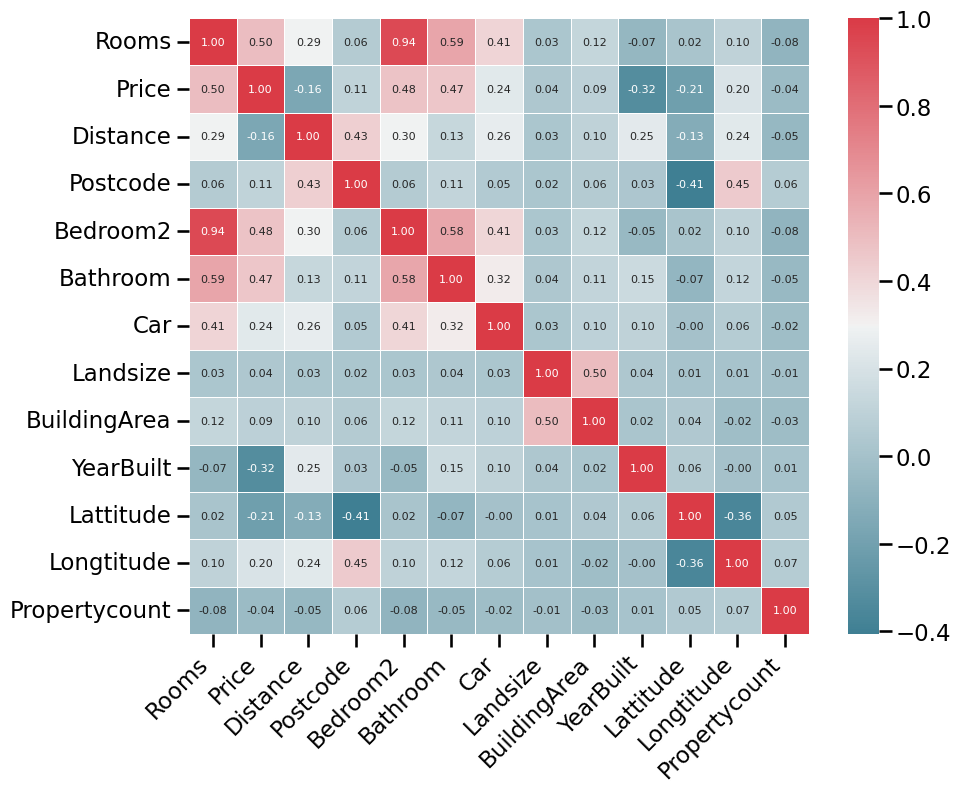

In [150]:
#Matriz de correlación
correlation_matrix = nuevo_df.corr()

#Gráfico
fig, ax = plt.subplots(figsize=(10, 8))
cmap = seaborn.diverging_palette(220, 10, as_cmap=True)
seaborn.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f", linewidths=0.5, ax=ax, annot_kws={"size": 8})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.show()

Observamos que la cantidad de habitaciones (en sus variables rooms y bethrooms) y la cantidad de baños son a primera vista las variables que mayor correlación directa tienen con el precio. En segundo lugar la cantidad de años de la construcción y la ubicación geográfica de la misma tiene una correlación negativa y menor, es interesante creemos tener en cuenta estas variables ya que en este primer análisis nos proveen la intucion de que están relacionadas con el precio de las viviendas. Tomamos como argumento seleccionar las variables que tienen una correlación con un valor absoluto mayor a 0.1

Respecto a las variables categóricas definimos eliminar la dirección ya que es una variable que no puede medirse como si sucede con latitud y longitud (además de que con la ubicación geográfica ya estamos analizando la influencia de la ubicación en el precio), además eliminamos las columnas 'Method', 'SellerG' y 'Date' ya que no aportan mayor información. 

La variable BuildingArea la tendremos en cuenta a pesar de tener baja correlación porque nos parece una variable relevante a priori.

In [151]:
#Selección de columnas
melb_limpio = melb_df[['Suburb', 'Rooms', 'Type', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
                       'YearBuilt', 'CouncilArea', 'Regionname', 'Lattitude', 'Longtitude', "BuildingArea", "Postcode"]]

### Limpieza de Outliers

In [152]:
melb_limpio.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,YearBuilt,Lattitude,Longtitude,BuildingArea,Postcode
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,8205.000000,13580.000000,13580.000000,7130.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,1964.684217,-37.809203,144.995216,151.967650,3105.301915
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,37.273762,0.079260,0.103916,541.014538,90.676964
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,0.000000,3000.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,1940.000000,-37.856822,144.929600,93.000000,3044.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,1970.000000,-37.802355,145.000100,126.000000,3084.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,1999.000000,-37.756400,145.058305,174.000000,3148.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,2018.000000,-37.408530,145.526350,44515.000000,3977.000000


Observamos que existen outliers. Solo sera necesario eliminar teninendo en cuenta el precio ya que estan relacionados. 
Por ejemplo el outlier de 10 habitaciones sera tambien un outlier de precio.
Nos exponemos a tener datos erroneos como una propiedad de 10 habitaciones pero de valor promedio, lo cual es inconsistente

In [153]:
#Distplot para observar la distribución de una forma más detallada
fig1 = px.histogram(melb_limpio, x='Price', nbins=100, title='Distribución del precio de las propiedades', color_discrete_sequence=['#FFA500'])
fig2 = px.histogram(melb_limpio, x='Rooms', nbins=100, title='Distribución de la cantidad de ambientes de las propiedades', color_discrete_sequence=['#FFA500'])


fig1.update_layout(xaxis_tickformat = ',.0f')
fig2.update_layout(xaxis_tickformat = ',.0f')


fig1.show()
fig2.show()


In [154]:
#Boxplot para profile_age
fig1 = px.box(melb_limpio, x='Price', title='Boxplot de precio de las propiedades')
fig2 = px.box(melb_limpio, x = 'Rooms', title = 'Boxplot de cantidad de ambientes de las propiedades')

fig1.show()
fig2.show()


Eliminamos los outliers de precio.
Para la limpieza de outliers utilizamos la funcion limpia_outliers utilizada en la materia AyV donde se aplica un criterio de percentiles a fin de eliminar valores extremos solo de la cola o máximos ya que la distribución es asimetrica positiva

In [155]:
#Defino la función a utilizar para eliminar outliers
def limpia_outliers(df, columna):
    """ Función que elimina los outliers del dataset """
    columna = df[columna]
    q1 = columna.quantile(0.25)
    q3 = columna.quantile(0.75)
    iqr = q3 - q1
    mask = (columna <= q3 + 2.5 * iqr) #Condición para eliminar outliers
    return df[mask]

In [156]:
#Aplico la función
melb_limpio = limpia_outliers(melb_limpio,'Price')

In [157]:
#Veo la distribución del precio
fig1 = px.histogram(melb_limpio, x='Price', nbins=100, title='Distribución del precio de las propiedades', color_discrete_sequence=['#FFA500'])
fig1.show()

In [158]:
melb_limpio.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,YearBuilt,Lattitude,Longtitude,BuildingArea,Postcode
count,13372.000000,1.337200e+04,13372.000000,13372.000000,13372.000000,13372.000000,13310.000000,8064.000000,13372.000000,13372.000000,6998.000000,13372.000000
mean,2.918486,1.032631e+06,10.177550,3104.852602,2.896201,1.513611,1.596769,1964.997272,-37.808644,144.994664,149.127955,3104.852602
std,0.945020,5.309251e+05,5.892451,91.160687,0.956926,0.664411,0.952271,37.031544,0.079575,0.104483,545.507923,91.160687
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,0.000000,3000.000000
25%,2.000000,6.450000e+05,6.200000,3044.000000,2.000000,1.000000,1.000000,1943.000000,-37.856625,144.928000,92.000000,3044.000000
50%,3.000000,9.000000e+05,9.300000,3084.000000,3.000000,1.000000,2.000000,1970.000000,-37.801200,144.999490,125.000000,3084.000000
75%,3.000000,1.309250e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,1999.000000,-37.755400,145.058145,170.000000,3148.000000
max,10.000000,3.028000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,2018.000000,-37.408530,145.526350,44515.000000,3977.000000


Podemos observar que no se eliminaron gran cantidad de registros y que los valores superiores de Price tienen mayor lógica.

## Ejercicio 3:

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

In [ ]:
# Creo una nueva base de datos
engine2 = create_engine('sqlite:///airbnb.sqlite3', echo=True)
# Ingesto los nuevos datos
melb_limpio.to_sql('melb_limpio', con=engine2, if_exists="replace")


In [160]:
#Creamos un csv con el conjunto de datos para poder ser utilizado en el siguiente ejercicio
melb_limpio.to_csv("melbourne_limpio.csv")

## 2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.

### 1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.

In [161]:
#Selecciono las variables interesantes
interesting_cols = [
  'city', 'suburb', 'state', 'zipcode',
  'price', 'latitude', 'longitude', 'property_type', 'minimum_nights', 'maximum_nights',
  'property_type', 'room_type', 'monthly_price', 'weekly_price'
]

#Cargo el csv
df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
    usecols=interesting_cols)

/var/folders/cj/5vjy5j1d55n_t92spc8yq57c0000gn/T/ipykernel_80796/3790544857.py:9: DtypeWarning:

Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.



In [162]:
df.head()

,city,suburb,state,zipcode,latitude,longitude,property_type,room_type,price,weekly_price,monthly_price,minimum_nights,maximum_nights
0,Manningham,Bulleen,VIC,3105,-37.772684,145.092133,House,Private room,60,NaN,NaN,1,365
1,Moreland,Brunswick East,VIC,3057,-37.766505,144.980736,Apartment,Private room,35,200.0,803.0,3,45
2,Port Phillip,St Kilda,VIC,3182,-37.859755,144.977369,Apartment,Entire home/apt,159,1253.0,4452.0,3,28
3,Darebin,Thornbury,VIC,3071,-37.758971,144.989228,House,Private room,50,250.0,920.0,2,200
4,Port Phillip,St Kilda East,VIC,3183,-37.864530,144.992238,House,Private room,69,400.0,1900.0,1,90


In [163]:
#Tamaño
len(df)

22895

Observo los valores faltantes para ver sobre que columnas es necesario aplicar transformaciones

<Axes: >

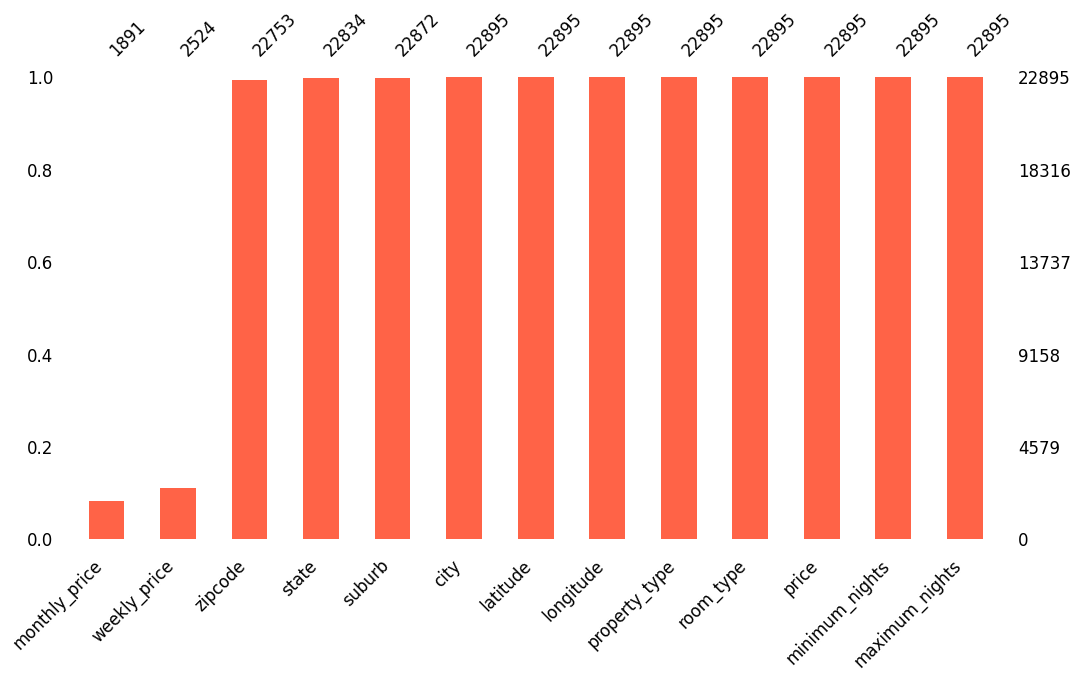

In [164]:
msno.bar(df ,figsize=(12, 6), sort="ascending",fontsize=12, color='tomato') 

Las columnas zipcode, state, suburb, monthly_price y weekly_price son las que tienen datos faltantes. Como monthly_price y weekly_price tienen demasiados datos faltantes procederemos a eliminarlas.

In [165]:
df_airbnb = df.copy()
df_airbnb.drop(columns = ["monthly_price", "weekly_price"], inplace = True)
df_airbnb

,city,suburb,state,zipcode,latitude,longitude,property_type,room_type,price,minimum_nights,maximum_nights
0,Manningham,Bulleen,VIC,3105,-37.772684,145.092133,House,Private room,60,1,365
1,Moreland,Brunswick East,VIC,3057,-37.766505,144.980736,Apartment,Private room,35,3,45
2,Port Phillip,St Kilda,VIC,3182,-37.859755,144.977369,Apartment,Entire home/apt,159,3,28
3,Darebin,Thornbury,VIC,3071,-37.758971,144.989228,House,Private room,50,2,200
4,Port Phillip,St Kilda East,VIC,3183,-37.864530,144.992238,House,Private room,69,1,90
...,...,...,...,...,...,...,...,...,...,...,...
22890,Melbourne,Carlton,VIC,3053.0,-37.802415,144.962967,Apartment,Private room,55,1,90
22891,Melton,Melton South,VIC,3338.0,-37.705095,144.574474,House,Entire home/apt,129,1,1125
22892,Monash,Glen Waverley,VIC,3150.0,-37.875252,145.162757,Guesthouse,Private room,53,3,1125
22893,Melbourne,Southbank,VIC,3006.0,-37.827795,144.954987,Apartment,Entire home/apt,130,7,750


Como zipcode, state y suburb tienen relativamente pocoss datos faltantes se imputarán con el valor más frecuente.

<Axes: >

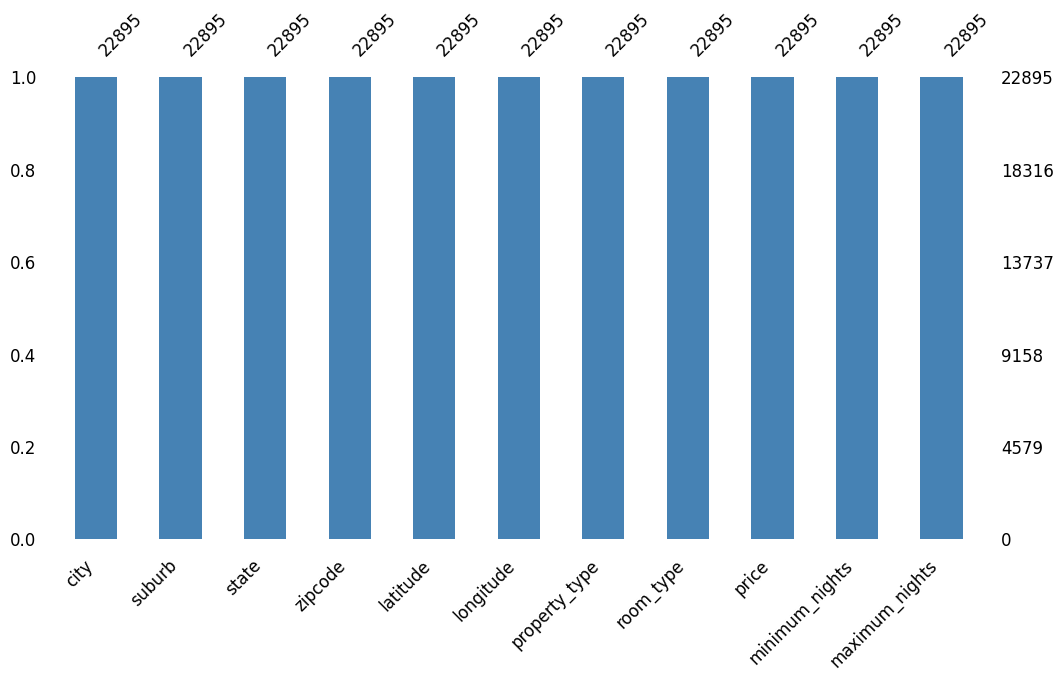

In [166]:
data_most_frequent = df_airbnb.copy()

#setting strategy to 'most_frequent' 

mean_imputer = SimpleImputer(strategy='most_frequent') # strategy can also be mean or median or most_frequent

data_most_frequent.iloc[:,:] = mean_imputer.fit_transform(data_most_frequent)
msno.bar(data_most_frequent,figsize=(12, 6), fontsize=12, color='steelblue')

Una vez aplicadas las transformaciones se observa que ya no hay datos nulos.

## 2.Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.

In [167]:
df_airbnb.zipcode.value_counts()

zipcode
3000.0        2491
3000           876
3006.0         860
3182.0         579
3182           556
              ... 
3096             1
3812             1
3000\n3000       1
3752             1
4068.0           1
Name: count, Length: 463, dtype: int64

Estandarizo los zipcode

In [168]:
df_airbnb['zipcode'] = pd.to_numeric(df_airbnb.zipcode, errors='coerce')

In [169]:
df_airbnb.zipcode.value_counts().head(5)

zipcode
3000.0    3367
3006.0    1268
3182.0    1135
3141.0     881
3004.0     728
Name: count, dtype: int64

Convierto los zipcode a int y relleno valores vacios

In [170]:
df_airbnb['zipcode_int'] = df_airbnb.zipcode.fillna(0).astype('int')

Para dejar solo aquellos zipcode que puedan agregar informacion relavante se establece un minimo 10 cantidades de registros

In [171]:
zipcode_counts = df_airbnb["zipcode_int"].value_counts() #Cuento los valores
filtered_zipcodes = zipcode_counts[zipcode_counts >= 10].index.tolist() #selecciono aquellos con al menos 10 registros
df_airbnb_filtered = df_airbnb[df_airbnb["zipcode_int"].isin(filtered_zipcodes)] #Aplico el filtro
df_airbnb_filtered

,city,suburb,state,zipcode,latitude,longitude,property_type,room_type,price,minimum_nights,maximum_nights,zipcode_int
0,Manningham,Bulleen,VIC,3105.0,-37.772684,145.092133,House,Private room,60,1,365,3105
1,Moreland,Brunswick East,VIC,3057.0,-37.766505,144.980736,Apartment,Private room,35,3,45,3057
2,Port Phillip,St Kilda,VIC,3182.0,-37.859755,144.977369,Apartment,Entire home/apt,159,3,28,3182
3,Darebin,Thornbury,VIC,3071.0,-37.758971,144.989228,House,Private room,50,2,200,3071
4,Port Phillip,St Kilda East,VIC,3183.0,-37.864530,144.992238,House,Private room,69,1,90,3183
...,...,...,...,...,...,...,...,...,...,...,...,...
22890,Melbourne,Carlton,VIC,3053.0,-37.802415,144.962967,Apartment,Private room,55,1,90,3053
22891,Melton,Melton South,VIC,3338.0,-37.705095,144.574474,House,Entire home/apt,129,1,1125,3338
22892,Monash,Glen Waverley,VIC,3150.0,-37.875252,145.162757,Guesthouse,Private room,53,3,1125,3150
22893,Melbourne,Southbank,VIC,3006.0,-37.827795,144.954987,Apartment,Entire home/apt,130,7,750,3006


Observo los registros en común antes de unir

In [176]:
intersection = numpy.intersect1d(
    df_airbnb.zipcode_int.values, melb_df.Postcode.values, assume_unique=False)
print("Airbnb unique zipcodes", len(df_airbnb.zipcode_int.unique()))
print("Sales unique zipcodes", len(melb_df.Postcode.unique()))
print("Common zipcodes", len(intersection))

Airbnb unique zipcodes 248
Sales unique zipcodes 198
Common zipcodes 191


In [177]:
print('Records in Sales df with corresponding zipcode form Airbnb df',
      melb_df.Postcode.isin(intersection).sum() / len(melb_df))
print('Records in Airbnb df with corresponding zipcode form Sales df',
      df_airbnb["zipcode_int"].isin(intersection).sum() / len(df_airbnb))

Records in Sales df with corresponding zipcode form Airbnb df 0.9985272459499264
Records in Airbnb df with corresponding zipcode form Sales df 0.9302904564315353


Elijo la columna mas relevante para unir

In [178]:
relevant_cols = ['price', 'zipcode_int']

In [179]:
## Option 1
# Pass a dictionary where the keys are the original columns to aggregate and
# the values are the operations (or list of operations).
airbnb_price_by_zipcode = df_airbnb[relevant_cols].groupby('zipcode_int')\
  .agg({'price': ['mean', 'count']})\
  .reset_index()
# Flatten the two level columns
airbnb_price_by_zipcode.columns = [
  ' '.join(col).strip()
  for col in airbnb_price_by_zipcode.columns.values]
# Rename columns
airbnb_price_by_zipcode = airbnb_price_by_zipcode.rename(
    columns={'price mean': 'airbnb_price_mean',
             'price count': 'airbnb_record_count'}
)

airbnb_price_by_zipcode.head()

,zipcode_int,airbnb_price_mean,airbnb_record_count
0,0,159.630137,146
1,2010,40.000000,1
2,2134,50.000000,1
3,2582,104.000000,1
4,3000,150.504307,3367


Uno ambos datasets

In [180]:
merged_sales_df = melb_df.merge(
    airbnb_price_by_zipcode, how='left',
    left_on='Postcode', right_on='zipcode_int'
)
merged_sales_df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,zipcode_int,airbnb_price_mean,airbnb_record_count
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0,3067.0,130.624031,258.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0,3067.0,130.624031,258.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0,3067.0,130.624031,258.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0,3067.0,130.624031,258.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0,3067.0,130.624031,258.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0,3150.0,124.026455,189.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0,3016.0,191.094595,74.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0,3016.0,191.094595,74.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0,3016.0,191.094595,74.0


In [181]:
#Veo las columnas
merged_sales_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'zipcode_int',
       'airbnb_price_mean', 'airbnb_record_count'],
      dtype='object')

In [182]:
#Paso a csv
merged_sales_df.to_csv("melbourne_and_airbnb.csv")

## 3. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Para combinar los datos se podria utilizar la longitud y latitud para que al coincidir con cierto margen de variacion se pueda asignar a una propiedad valores estimados de precios y de esta forma completar de una manera mas detallada los datos. A demás a traves de estas variables se podría generar un algoritmo que permitise localizar las ubicaciones cercanas y luego poder establecer carácteristicas en común. Otra variable que se podría utilizar es la calle pero eso ya no nos daría información tan detallada ya que no cuenta con número, aunque aún así nos permitiría combinar los datos y entender mejor posibles patrones. 

## Ejercicios opcionales:

1. Armar un script en python (archivo .py) [ETL](https://towardsdatascience.com/what-to-log-from-python-etl-pipelines-9e0cfe29950e) que corra los pasos de extraccion, transformacion y carga, armando una funcion para cada etapa del proceso y luego un main que corra todos los pasos requeridos.

2. Armar un DAG en Apache Airflow que corra el ETL. (https://airflow.apache.org/docs/apache-airflow/stable/tutorial.html)